### Imports

In [2]:
import matplotlib.pyplot as plt
from scipy import stats
from tqdm.notebook import tqdm
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
import subjects

### Is sleep deprivation different from sleep and MAZE in terms of network connectivity

In [42]:
sessions = subjects.pf_sess()

grph_metric = []
for s, sess in enumerate(sessions):
    post = sess.paradigm["post"].flatten()
    period = [post[0], post[0] + 5 * 3600]
    neurons = sess.neurons_stable.get_neuron_type("pyr")

    get_corr = lambda epoch: np.corrcoef(
        (
            neurons.time_slice(epoch[0], epoch[1]).get_binned_spiketrains(bin_size=0.25)
        ).spike_counts
    )
    epochs = sess.get_zt_epochs()
    for e in epochs.itertuples(): 

        pair_corr = get_corr([e.start,e.stop])
        # pair_corr = np.tril(pair_corr,k=-1)
        np.fill_diagonal(pair_corr, 0)
        # pair_corr = np.where(pair_corr > 0, pair_corr, 0)
        grph = nx.from_numpy_matrix(pair_corr)

        clu_coeff = np.array(list(nx.clustering(grph,weight='weight').values()))

        grph_metric.append(
            pd.DataFrame(
                dict(
                    clu_coeff=clu_coeff,
                    # geo=[nx.average_shortest_path_length(grph)],
                    zt=e.label,
                    grp=sess.tag,
                )
            )
        )

grph_metric = pd.concat(grph_metric, ignore_index=True)


<AxesSubplot:xlabel='zt', ylabel='clu_coeff'>

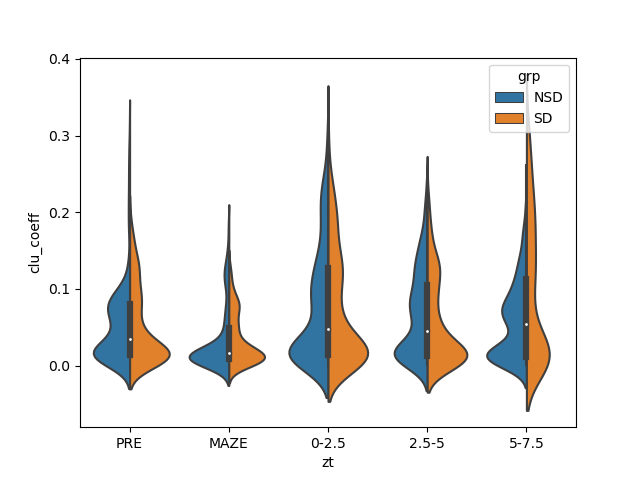

In [48]:
_,ax = plt.subplots()

# np.fill_diagonal(pair_corr,0)
# ax.imshow(pair_corr)
sns.violinplot(data=grph_metric,x='zt',y='clu_coeff',hue='grp',split=True)